<div style = "text-align:right"> Antoine Moulin </div>

<h1> Etude de cas : régression non-paramétrique par splines cubiques </h1>

<h2> Questions préliminaires </h2>

<h3> Question 1 </h3>

Démontrer $(11)$.

<hr/>

On a 

$$S(\textbf{g}) = \textbf{g}^{T} \left( I + \alpha K \right) \textbf{g} - 2 \textbf{Y}^{T}\textbf{g} + \textbf{Y}^{T}\textbf{Y}$$

Il s'agit d'une fonction deux fois différentiable dont le gradient vaut 

$$\nabla S(\textbf{g}) = 2 \left( I + \alpha K \right) \textbf{g} - 2 \textbf{Y}$$

et la hessienne vaut

$$\nabla^{2}S(\textbf{g}) = 2 \left( I + \alpha K \right)$$

Cette matrice étant définie positive, $S$ est strictement convexe et admet donc un <u>unique minimum</u>. Celui-ci est atteint lorsque $\nabla S(\textbf{g}) = 0$, i.e. lorsque

$$\left( I + \alpha K \right) \textbf{g} = \textbf{Y}$$

puis comme $\left( I + \alpha K \right)$ est inversible (car définie positive) 

$$\boxed{\textbf{g} = \left( I + \alpha K \right)^{-1} \textbf{Y}}$$

<h3> Question 2 </h3>

Supposons que l'on dipose, pour la valeur $t_{i}$ de l'instant de régression, de  $m_{i}$ observations, $Y_{ij}, j \in \lbrace 1, \dots, m_{i} \rbrace$. Notons $\overline{Y}_{i} = m_{i}^{-1} \displaystyle\sum_{j = 1}^{m_{i}} Y_{ij}$. Notons $S(g)$ la somme pénalisée associée à l'ensemble initial

$$S(g) = \sum_{i}\sum_{j} \left( Y_{ij} - g(t_{i}) \right)^{2} + \alpha \int_{a}^{b} |g''|^{2}$$

Montrer que ce problème est équivalent à minimiser la somme pondérée

$$S(g) = \sum_{i} m_{i} \left( \overline{Y}_{i} - g(t_{i}) \right)^{2} + \alpha \int_{a}^{b} |g''|^{2}$$


<hr/>

La somme pénalisée associée à l'ensemble initial peut se réécrire

$$S(g) = \sum_{i} \left( \sum_{j} Y_{ij}^{2} - 2 g(t_{i}) m_{i} \overline{Y_{i}} + m_{i} g(t_{i})^{2} \right)$$

Comme il s'agit de minimiser cette fonction, on peut le faire à une constante près et remplacer $\displaystyle\sum_{j} Y_{ij}^{2}$ par $m_{i} \left( \overline{Y}_{i} \right)^{2}$. Il s'agit donc de minimiser

$$S(g) = \sum_{i} \left( m_{i} \left( \overline{Y}_{i} \right)^{2} - 2 g(t_{i}) m_{i} \overline{Y_{i}} + m_{i} g(t_{i})^{2} \right)$$

i.e.

$$\boxed{S(g) = \sum_{i} m_{i} \left( \overline{Y}_{i} - g(t_{i}) \right)^{2} + \alpha \int_{a}^{b} |g''|^{2}}$$

<h3> Question 3 </h3>

Soit $w_{1}, \dots, w_{n}$ des poids strictements positifs; considérons le critère pondéré

$$\sum_{i = 1}^{n} w_{i} \left( Y_{i} - g(t_{i}) \right)^{2} + \alpha \int_{a}^{b} |g''|^{2}$$

Enoncer et démontrer un analogue du théorème $3.2$.

<hr/>

<h3> Question 4 </h3>

On définit le risque de validation croisé par

$$CV(\alpha) = \sum_{i = 1}^{n} w_{i} \left( Y_{i} - \widehat{g}^{(-i)}(t_{i}, \alpha) \right)^{2}$$

Montrer que

$$CV(\alpha) = \sum_{i = 1}^{n} w_{i} \left( \frac{Y_{i} - \widehat{g}(t_{i})}{\left[I - A_{W}(\alpha) \right]_{ii}} \right)^{2}$$

où $A_{W}(\alpha) = \left( W + \alpha QR^{-1}Q^{T} \right)^{-1}W$ et $W$ est la matrice diagonale de diagonale $w_{1}, \dots, w_{n}$.

<hr/>

<h3> Question 5 </h3>

En déduire un analogue du GCV dans le cas pondéré.

<hr/>

<h2> Questions à réaliser en salle de TP </h2>

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

<h3> Question 1 </h3>

Récupérer les données et construire les vecteurs $t_{i}$ et $Y_{i}, i = 1, \dots, n$ ($2^{e}$ et $3^{e}$ colone du fichier, respectivement). Remarquer que l'on est dans le cas d'observations multiples de la questions préliminaire $2$. Construire les poids $m_{i}$ et les valeurs agrégées $\overline{Y}_{i}, i = 1, \dots, n$.

<hr/>

In [47]:
data = np.loadtxt('Motorcycledata.txt')

t = data[:, 1] # on remarque que certains temps sont égaux
Y = data[:, 2]

t_unique = np.unique(t)
n = t_unique.shape[0]
Y_mean = np.zeros(t_unique.shape)
weights = np.zeros(t_unique.shape)

for i in range(len(t_unique)):
    for j in range(len(t)):
        if (t_unique[i] == t[j]):
            Y_mean[i] += Y[j]
            weights[i] += 1
            
Y_mean /= weights

<h3> Question 2 </h3>

Ajuster les coefficients d'un polynôme de degré $m$ au sens des moindres carrés; faire varier $m$ et discuter les résultats observés.

<hr/>

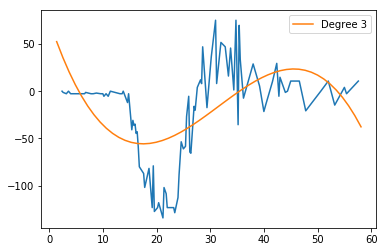

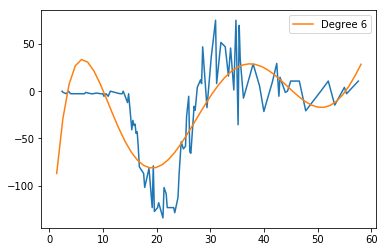

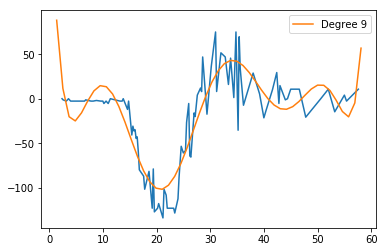

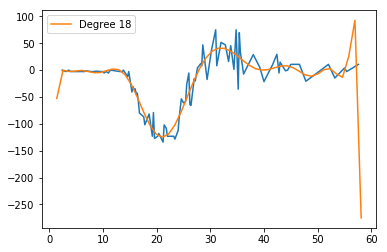

In [94]:
m = [3, 6, 9, 18]
x_plot = np.linspace(min(t_unique) - 1, max(t_unique) + 0.5)

for degree in m:
    model = np.poly1d(np.polyfit(t_unique, Y_mean, degree))
    plt.figure()
    plt.plot(t_unique, Y_mean)
    plt.plot(x_plot, model(x_plot), label = 'Degree ' + str(degree))
    plt.legend(loc = 'best')
    plt.show()

On remarque que pour des degrés élevés, on arrive plus ou moins à récupérer les variations de notre ensemble de données. Néanmoins, on se rend compte d'un problème majeur qui est un problème de bords. En effet, on remarque que le polynôme explose aux extrêmités.

<h3> Question 3 </h3>

Implémenter la méthode de régression spline (calcul de $\textbf{g}$ pour $\alpha$ donné). Comparer le résultat obtenu pour $\alpha = 10, 20, 30$ avec ceux de la régression polynomiale.

<hr/>

$\textbf{g} = \left( D + \alpha K \right)^{-1} D y$

In [146]:
Q[:5, :5]

array([[ 5.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-6.66666667,  1.66666667,  0.        ,  0.        ,  0.        ],
       [ 1.66666667, -4.16666667,  2.5       ,  0.        ,  0.        ],
       [ 0.        ,  2.5       , -5.        ,  2.5       ,  0.        ],
       [ 0.        ,  0.        ,  2.5       , -2.95454545,  0.45454545]])

In [138]:
H = np.array([t_unique[i+1] - t_unique[i] for i in range(len(t_unique)-1)])

Q = np.zeros((n, n-2))

for j in range(n-2):
    Q[j, j] = H[j]**(-1)
    Q[j+1, j] = - H[j]**(-1) - H[j+1]**(-1)
    Q[j+2, j] = H[j+1]**(-1)

    
R = np.zeros((n-2, n-2))

for i in range(n-2):
    R[i, i] = (1/3)*(H[i]+H[i+1])
    
for i in range(n-3):
    R[i, i+1] = (1/6)*H[i+1]
    R[i+1, i] = (1/6)*H[i+1]

K = Q@np.linalg.inv(R)@Q.T
    
D = np.diag(weights)

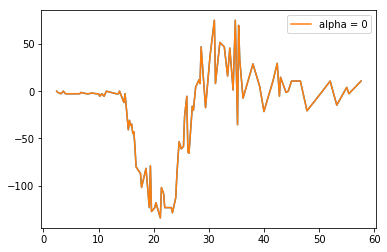

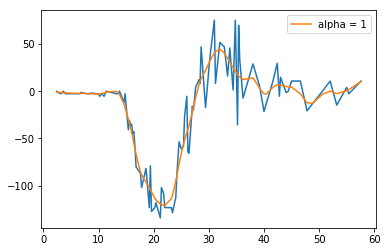

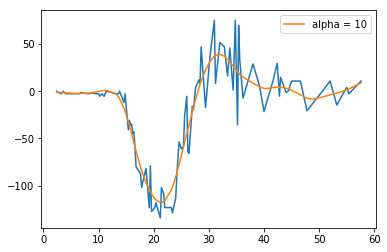

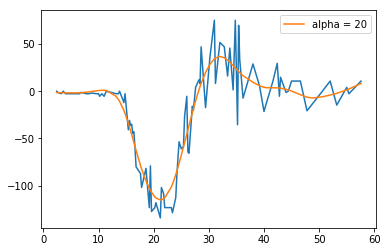

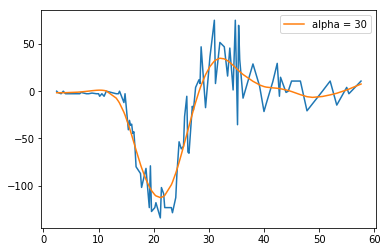

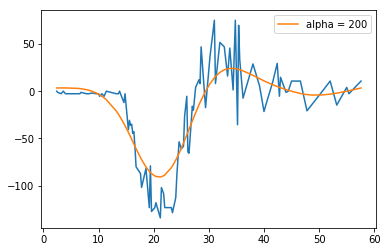

In [145]:
alphas_values = [0, 1, 10, 20, 30, 200]

for alpha in alphas_values:
    g = np.linalg.inv(D + alpha*K)@D@Y_mean
    plt.figure()
    plt.plot(t_unique, Y_mean)
    plt.plot(t_unique, g, label = 'alpha = {}'.format(alpha))
    plt.legend(loc = 'best')

<h3> Question 4 </h3>

Implémenter la méthode de validation croisée et calculer $CV(\alpha)$ pour des valeurs de $\alpha$ entre $1$ et $100$. Minimiser en alpha numériquement.

<hr/>

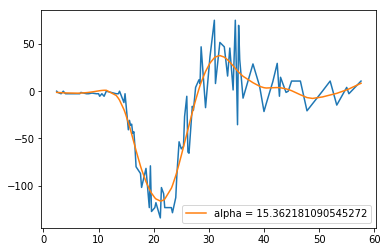

In [184]:
alphas = np.linspace(1, 100, 2000) # np.arange(1, 100) # np.linspace(1, 100, 10)
CV_risk = []

for alpha in alphas:
    A = np.linalg.inv(D + alpha*K)@D
    TMP = np.eye(A.shape[0]) - A
    
    g_alpha = A@Y_mean
    
    CV_risk.append(np.linalg.norm(np.sqrt(D)@((Y_mean - g_alpha)/np.diag(TMP)))**2)
    
best_alpha = alphas[np.argmin(CV_risk)]

best_g = g = np.linalg.inv(D + best_alpha*K)@D@Y_mean

plt.figure()
plt.plot(t_unique, Y_mean)
plt.plot(t_unique, best_g, label = 'alpha = {}'.format(best_alpha))
plt.legend(loc = 'best')

<h3> Question 5 </h3>

Implémenter la méthode de validation croisée généralisée; comparer avec la méthode précédente (résultats, temps de calcul).

<hr/>

$$GCV(\alpha) = \frac{ \sum_{i=1}^{n} w_{i} \left( Y_{i} - g(t_{i}) \right)^{2}}{\left( 1 - tr(DA(\alpha)) \right)^{2} } = \left|\left| \frac{\sqrt{D}(Y - g)}{1 - tr(DA)} \right|\right|^{2}$$

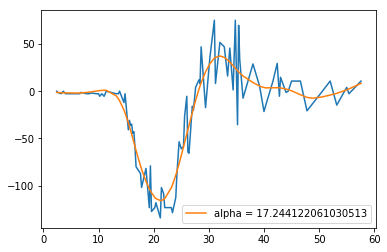

In [185]:
alphas = np.linspace(1, 100, 2000) # np.arange(1, 100) # np.linspace(1, 100, 10)
GCV_risk = []

for alpha in alphas:
    A = np.linalg.inv(D + alpha*K)@D
    TMP = np.eye(A.shape[0]) - A
    
    g_alpha = A@Y_mean
    
    GCV_risk.append(np.linalg.norm(np.sqrt(D)@(Y_mean - g_alpha)/(1 - (1/n)*np.trace(A)))**2)
    
best_alpha = alphas[np.argmin(GCV_risk)]

best_g = g = np.linalg.inv(D + best_alpha*K)@D@Y_mean

plt.figure()
plt.plot(t_unique, Y_mean)
plt.plot(t_unique, best_g, label = 'alpha = {}'.format(best_alpha))
plt.legend(loc = 'best')